# Download Image Data from Bucket

In [1]:
import sys
sys.path.append('../src')

from data_utils import download_tiff_images, display_tiff

# Bucket and directory
bucket_name = 'tree-counting-project'
prefix = 'GEE Dataset/'
local_dir = '../Data//GEE Dataset/Dataset'

# # Download images
download_tiff_images(bucket_name, prefix, local_dir)

Downloaded GEE Dataset/Sion_1_switzerland.tif to ../Data//GEE Dataset/Dataset/Sion_1_switzerland.tif
Downloaded GEE Dataset/Sion_1_switzerland_winter.tif to ../Data//GEE Dataset/Dataset/Sion_1_switzerland_winter.tif
Downloaded GEE Dataset/image_1_Netherlands.tif to ../Data//GEE Dataset/Dataset/image_1_Netherlands.tif
Downloaded GEE Dataset/image_1_Netherlands_.25.tif to ../Data//GEE Dataset/Dataset/image_1_Netherlands_.25.tif
Downloaded GEE Dataset/image_1_Netherlands_10.tif to ../Data//GEE Dataset/Dataset/image_1_Netherlands_10.tif
Downloaded GEE Dataset/image_2_Netherlands.tif to ../Data//GEE Dataset/Dataset/image_2_Netherlands.tif
Downloaded GEE Dataset/image_3_Netherlands.tif to ../Data//GEE Dataset/Dataset/image_3_Netherlands.tif


# Diplay Image

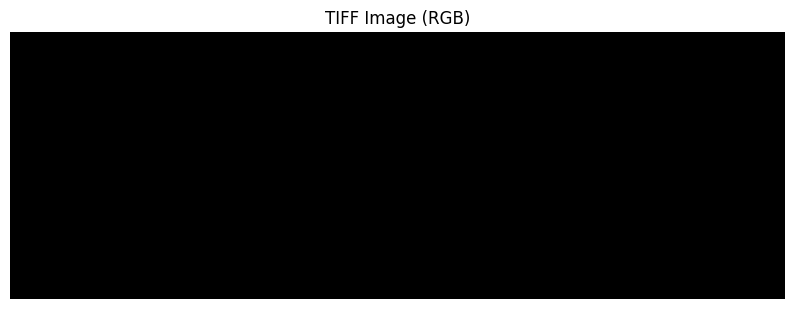

In [13]:
# Display an image
tiff_path = '../Data/GEE Dataset/Dataset/image_1_Netherlands_.25.tif'
display_tiff(tiff_path)


In [12]:
os.chdir('/home/jupyter/ee_tree_counting/Notebooks')

os.getcwd()


'/home/jupyter/ee_tree_counting/Notebooks'

In [9]:
sys.path.append('../src')



In [3]:
import ee
ee.Authenticate()

True

In [4]:
ee.Initialize()

In [5]:
import geemap

In [6]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [5]:
# https://viewer.nationalmap.gov/services/
url = "https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}"
Map.add_tile_layer(url, name="Google Satellite", attribution="Google")

# Converting Geotiff files to PNG for labelling

In [29]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

def convert_geotiff_to_png(input_file, output_file):
    with rasterio.open(input_file) as src:
        band1 = src.read(1)  # Red
        band2 = src.read(2)  # Green
        band3 = src.read(3)  # Blue
        
        rgb_image = np.dstack((band1, band2, band3))
        
        plt.imshow(rgb_image)
        plt.axis('off')
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()
        

output_file = '/home/jupyter/ee_tree_counting/Data/GEE Dataset/PNG/Sion_1_switzerland.png'

convert_geotiff_to_png(tiff_path, output_file)

